In [39]:
import os
import pandas as pd
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import keras
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [43]:
os.listdir('../../images/neuronal_network')

['validation.png']

In [8]:
model=keras.models.load_model('../../../Prototype/code/saved_models/neuronal_network/neuronal_network_tuned_v2.keras',safe_mode=False)

In [12]:
selected_features=pd.read_csv('../../../Prototype/code/hyperparameter_tuning/neuronal_network/v2/neuronal_network_selected_train_features_v2.csv')
selected_features.set_index('url',inplace=True)

In [13]:
selected_features.columns

Index(['https_true', 'url_digits_count', 'url_lenght', 'url_dot_count',
       'url_hyphen_count', 'url_slash_count', 'url_questionmark_count',
       'url_equal_count', 'url_at_count', 'url_and_count', 'url_www_count',
       'url_https_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_hyphen_count', 'hostname_isip', 'hostname_digits_count',
       'query_lenght', 'query_dot_count', 'query_underline_count',
       'query_slash_count', 'query_equal_count', 'query_and_count',
       'file_lenght', 'file_dot_count', 'file_underline_count',
       'file_hyphen_count', 'html_hl_ratio_int', 'html_hl_ratio_ext',
       'html_hl_ratio_null', 'html_hl_ratio_a_int', 'html_hl_ratio_a_ext',
       'html_hl_ratio_a_null', 'html_hl_ratio_link_int',
       'html_hl_ratio_link_ext', 'html_hl_ratio_src_other_int',
       'html_hl_ratio_src_other_ext', 'html_hl_ratio_media_int',
       'html_hl_ratio_media_ext', 'html_hl_ratio_media_null',
       'html_hl_ratio_form_null', 'html_hl_rati

In [14]:
validation_df=pd.read_csv('../../extracted_features/merged_features/merged_features.csv')
validation_df.set_index('url',inplace=True)

In [15]:
features=validation_df.loc[:,'https_true':]
label=validation_df.loc[:,'phishing']

In [16]:
label

url
https://developers.facebook.com/docs/workplace/reference?ref=AVsgF6uSqXiUYjAHsyFSUNofDKZQBegjXTnlWWfpFONfT8XHcYasQcKhxbHhzBZALaJRxsGoZ-FkkxuHXdBeNXVUD_AYUxX9dItacAQrurjwjv3khVg1fmdDVpDSz4BLxstDrDpcaNE2XSrA0ZTAvH1-dXvTh5K139zWzabAz9wpO3_F0sbHzHOYIoop_jkpp-VLOQO3HXT1wtWo-loBvWBfw7QAnHhkkniNrgz0mX-MuctdaipBUnm-oIHMq5NiEB2jOT0jeuYlGyFQSqAfNwVbd6_86eDKVNaDg5OlJ-5vowFWiy4YK99uv9r6AIo3Z7ZVj0ucS-2SqUshfszOkhE6kWLGAb1FtZqTPuZCHWYkjj2EJKG1IrGLUo_L-xID-XdiPfk9oSwCz7QofqJqes7PyVaPQBQJM9goMSA87O-qyHCVAKbrhWrsWB55FPsE9G52XgYwU6joYhirycyV0oGx    0
https://developers.facebook.com/docs/workplace/reference?ref=AVsJBmQyVx-4717O4tYWBl9uXRbyzn17CGN4-FDWRFWqQ0Wx5azkVo4yFimTDR5UA3zZk0q1_EVCPU6tZ3RO7bQQb3UyorVL97u_FEyQUohCZJgds_flIHsP_a-a0a7MRhAaGTXM8w0IERA-vcviRevn2uu7Ap5Fo88PnsgrVYJsQwPinEYvVf9vEHagNczRu1U4Xd6a-9Xev1VJEQbGRlBy-OtWCvdBQp_UtFT1vDw4_Z5YVBEwHPn--fQDDIExhrBqkWi8s9-88eCrVou3rQ0FziQzp3nZghuMAY3c6hd-u9EynmpKB5LT76_A1k_AVgd_L7DVAFgM2F_1h1XebjZFgW5Yaqf80N95knoGwrs3iMhWNG5c7bXsUrWR87AqBR0         

In [17]:
features=features[selected_features.columns]

In [18]:
features

,https_true,url_digits_count,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,...,html_hl_ratio_form_null,html_hl_ratio_fav_int,html_hl_ratio_css_int,html_hl_ratio_css_ext,html_hl_external_css,html_unsafe_anchor,html_iframe_invisible,html_empty_title,openpagescore,cantina
url,,,,,,,,,,,,,,,,,,,,,
https://developers.facebook.com/docs/workplace/reference?ref=AVsgF6uSqXiUYjAHsyFSUNofDKZQBegjXTnlWWfpFONfT8XHcYasQcKhxbHhzBZALaJRxsGoZ-FkkxuHXdBeNXVUD_AYUxX9dItacAQrurjwjv3khVg1fmdDVpDSz4BLxstDrDpcaNE2XSrA0ZTAvH1-dXvTh5K139zWzabAz9wpO3_F0sbHzHOYIoop_jkpp-VLOQO3HXT1wtWo-loBvWBfw7QAnHhkkniNrgz0mX-MuctdaipBUnm-oIHMq5NiEB2jOT0jeuYlGyFQSqAfNwVbd6_86eDKVNaDg5OlJ-5vowFWiy4YK99uv9r6AIo3Z7ZVj0ucS-2SqUshfszOkhE6kWLGAb1FtZqTPuZCHWYkjj2EJKG1IrGLUo_L-xID-XdiPfk9oSwCz7QofqJqes7PyVaPQBQJM9goMSA87O-qyHCVAKbrhWrsWB55FPsE9G52XgYwU6joYhirycyV0oGx,1,54,533,2,11,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/docs/workplace/reference?ref=AVsJBmQyVx-4717O4tYWBl9uXRbyzn17CGN4-FDWRFWqQ0Wx5azkVo4yFimTDR5UA3zZk0q1_EVCPU6tZ3RO7bQQb3UyorVL97u_FEyQUohCZJgds_flIHsP_a-a0a7MRhAaGTXM8w0IERA-vcviRevn2uu7Ap5Fo88PnsgrVYJsQwPinEYvVf9vEHagNczRu1U4Xd6a-9Xev1VJEQbGRlBy-OtWCvdBQp_UtFT1vDw4_Z5YVBEwHPn--fQDDIExhrBqkWi8s9-88eCrVou3rQ0FziQzp3nZghuMAY3c6hd-u9EynmpKB5LT76_A1k_AVgd_L7DVAFgM2F_1h1XebjZFgW5Yaqf80N95knoGwrs3iMhWNG5c7bXsUrWR87AqBR0,1,69,448,2,10,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/docs/workplace/reference?ref=AVs7jgpP6Ff393iUP16H7uf5f9DvZ7R7n7N0kUF4gxbOGshahrPbsTaX9ATpquxdFw0dVygX69q1BPprCkLdUAFsvF4oJ-rlEUBZY-kYTdD7UlH9UDKX_oT-Zxs6QD9Y-j1paB-DYf35Sj_NRpXM8bl8gs27krjD9zeJhuoQ9nxOQ7tNvut_GkS8QkkPSMVbFAZBV_ayPcgo1l1RW4X_hAgfnnG0kJ541kDiaJAxbhKI_k_hKX3Pu--H4mFtanHaYSe-ni4PsU4yIqyOHxTXEBNK,1,47,341,2,8,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/docs/workplace/reference?ref=AVt9DH-HiKZRfphxe_6M0bN244xgrFptqfgOIVzD4hM-dD-_0rXyQWnyGNfFABcAXguxRIWSa3flwFVmOhnm2jASB3aQ9ux7_Na-DOoKoCMtwEZkV9VgTFb0RlgIw2OkZ08IrGFw-n38DEEEwFS0WV6UolAFMq8T1YelJGO_JpUvwGtKdQ9ioVPo6AilGzdkRdgaAJRX6TAuEn6M8LOaszE7Wzhsl8JiuDe4JcX8VMFznbhcMZc735P1m_x_hDyOn_o,1,37,320,2,5,5,1,1,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
https://developers.facebook.com/brad.the.pianoman/videos/10164361892170554/,1,17,75,4,0,6,0,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0,0,0,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://zy2b1r.webwave.dev/,1,2,27,2,0,3,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0,0,0,2,1.0
https://pub-a74120e6cc664f18a0ed7ff888d4cd91.r2.dev/shaw.html,1,20,61,3,1,3,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,2,0.0
https://fill-the-appeal-form-here.github.io/meta-hepl/,1,0,54,2,5,4,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,4,1.0


In [20]:
scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)
#X_test_normalized_selected_test = scaler.transform(X_test_selected_test)

In [23]:
y_pred_test = model.predict(features_scaled)
y_pred_test = tf.squeeze(y_pred_test)
y_pred_test = np.array([1 if x >= 0.5 else 0 for x in y_pred_test])

88/88 [==============================] - 0s 713us/step


Accuracy: 0.8261802575107297
Recall: 0.9211850195640022


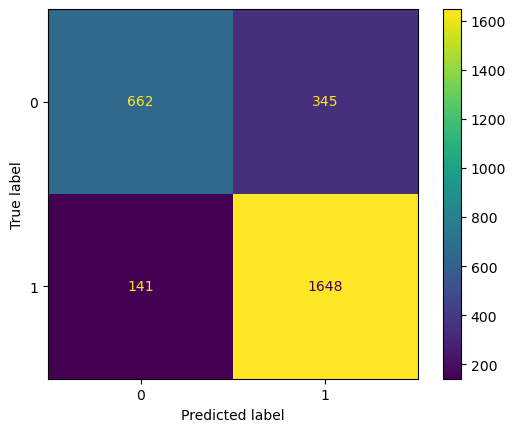

In [40]:
print("Accuracy:",metrics.accuracy_score(label,y_pred_test))
print("Recall:",metrics.recall_score(label, y_pred_test))
conf_mat = confusion_matrix(label,y_pred_test)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat).plot()
plt.savefig('',dpi=300, bbox_inches = "tight")
plt.savefig('../../images/neuronal_network/validation',dpi=300, bbox_inches = "tight")